In [1]:
import pandas as pd
df=pd.read_csv(r'C:\Users\anany\Downloads\Online_Consumer.csv')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN

In [4]:
df

,Unnamed: 0,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,...,0,0,0,0,0,0,0,0,0,1
1,1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,...,0,0,0,0,0,0,0,0,0,1
2,2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,...,0,0,0,0,0,0,0,0,0,1
3,3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,...,0,0,0,0,0,0,0,0,0,1
4,4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,...,0,0,0,0,0,0,0,0,0,1
12326,12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,...,0,0,0,0,1,0,0,0,0,1
12327,12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,...,0,0,0,0,1,0,0,0,0,1
12328,12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,...,0,0,0,0,1,0,0,0,0,1


In [5]:
df=df.drop('Unnamed: 0',axis=1)

In [6]:
df.dtypes

Administrative                     int64
Administrative_Duration          float64
Informational                      int64
Informational_Duration           float64
ProductRelated                     int64
ProductRelated_Duration          float64
BounceRates                      float64
ExitRates                        float64
PageValues                       float64
SpecialDay                       float64
OperatingSystems                   int64
Browser                            int64
Region                             int64
TrafficType                        int64
Weekend                            int64
Revenue                            int64
Month_Aug                          int64
Month_Dec                          int64
Month_Feb                          int64
Month_Jul                          int64
Month_June                         int64
Month_Mar                          int64
Month_May                          int64
Month_Nov                          int64
Month_Oct       

Creating X & Y variables

In [7]:
x=df.drop('Revenue',axis=1)
x

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,...,0,0,0,0,0,0,0,0,0,1
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,...,0,0,0,0,1,0,0,0,0,1
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,...,0,0,0,0,1,0,0,0,0,1
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,...,0,0,0,0,1,0,0,0,0,1


In [8]:
y=df['Revenue']
y

0        0
1        0
2        0
3        0
4        0
        ..
12325    0
12326    0
12327    0
12328    0
12329    0
Name: Revenue, Length: 12330, dtype: int64

### Prediction : Logistic Regression

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [10]:
model =LogisticRegression()
model.fit(x_train, y_train)

c:\Users\anany\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [11]:
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [12]:
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)
print('----------------------------------')

TN, FP, FN, TP = conf_matrix.ravel()

sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

print(f'Sensitivity: {sensitivity:.2f}')
print(f'Specificity: {specificity:.2f}')

print('----------------------------------')
print('Accuracy Score:')
print(accuracy_score(y_test,y_pred))

print('----------------------------------')
print('Classification report:')
print(classification_report(y_pred,y_test))

Confusion Matrix:
[[2023   58]
 [ 239  146]]
----------------------------------
Sensitivity: 0.38
Specificity: 0.97
----------------------------------
Accuracy Score:
0.8795620437956204
----------------------------------
Classification report:
              precision    recall  f1-score   support

           0       0.97      0.89      0.93      2262
           1       0.38      0.72      0.50       204

    accuracy                           0.88      2466
   macro avg       0.68      0.81      0.71      2466
weighted avg       0.92      0.88      0.90      2466



#### Logistic Regression using SMOTE oversampling Technique

In [13]:
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(x,y)

In [14]:
xr_train,xr_test,yr_train,yr_test=train_test_split(X_resampled, y_resampled,test_size=0.2)

In [15]:
model_smote=LogisticRegression()

In [16]:
model_smote.fit(xr_train,yr_train)
yr_predict = model_smote.predict(xr_test)
yr_predict

c:\Users\anany\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 1, 1, ..., 0, 1, 0], dtype=int64)

In [17]:
conf_matrix = confusion_matrix(yr_test, yr_predict)
print('Confusion Matrix:')
print(conf_matrix)
print('----------------------------------')

TN, FP, FN, TP = conf_matrix.ravel()

sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

print(f'Sensitivity: {sensitivity:.2f}')
print(f'Specificity: {specificity:.2f}')

print('----------------------------------')
print('Accuracy Score:')
print(accuracy_score(yr_test,yr_predict))

print('----------------------------------')
print('Classification report:')
print(classification_report(yr_predict,yr_test))

Confusion Matrix:
[[1381   65]
 [ 219 1571]]
----------------------------------
Sensitivity: 0.88
Specificity: 0.96
----------------------------------
Accuracy Score:
0.9122373300370828
----------------------------------
Classification report:
              precision    recall  f1-score   support

           0       0.96      0.86      0.91      1600
           1       0.88      0.96      0.92      1636

    accuracy                           0.91      3236
   macro avg       0.92      0.91      0.91      3236
weighted avg       0.92      0.91      0.91      3236



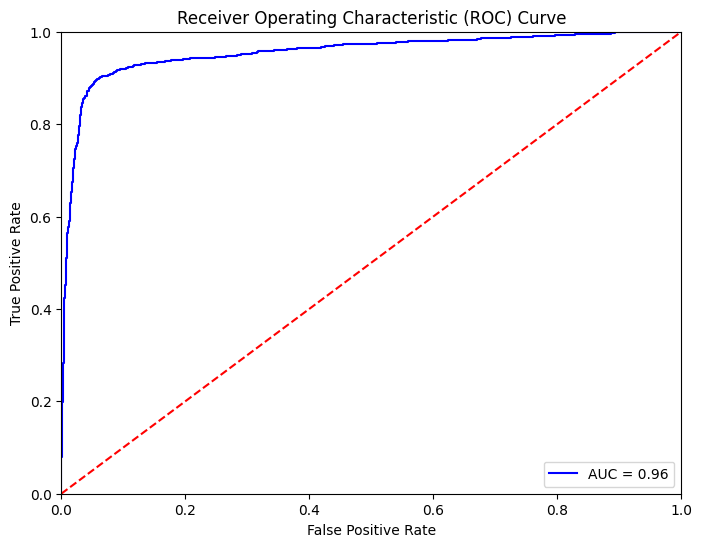

In [18]:
from sklearn.metrics import roc_curve, auc
y_true = yr_test
y_scores = model_smote.predict_proba(xr_test)[:, 1]
fpr, tpr, _ = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

### Decision Tree

In [19]:
model_dt=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)
model_dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [20]:
y_dt_pred=model_dt.predict(x_test)
y_dt_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [21]:
conf_matrix = confusion_matrix(y_test, y_dt_pred)
print('Confusion Matrix:')
print(conf_matrix)
print('----------------------------------')

TN, FP, FN, TP = conf_matrix.ravel()

sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

print(f'Sensitivity: {sensitivity:.2f}')
print(f'Specificity: {specificity:.2f}')

print('----------------------------------')
print('Accuracy Score:')
print(accuracy_score(y_test,y_dt_pred))

print('----------------------------------')
print('Classification report:')
print(classification_report(y_dt_pred,y_test))

Confusion Matrix:
[[1973  108]
 [ 140  245]]
----------------------------------
Sensitivity: 0.64
Specificity: 0.95
----------------------------------
Accuracy Score:
0.8994322789943228
----------------------------------
Classification report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      2113
           1       0.64      0.69      0.66       353

    accuracy                           0.90      2466
   macro avg       0.79      0.81      0.80      2466
weighted avg       0.90      0.90      0.90      2466



#### Decision Tree with SMOTE

In [22]:
model_dt_smote=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [23]:
model_dt_smote.fit(xr_train,yr_train)
y_pred_smote= model_dt_smote.predict(xr_test)
y_pred_smote

array([0, 1, 1, ..., 0, 1, 0], dtype=int64)

In [24]:
conf_matrix = confusion_matrix(yr_test, y_pred_smote)
print('Confusion Matrix:')
print(conf_matrix)
print('----------------------------------')

TN, FP, FN, TP = conf_matrix.ravel()

sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

print(f'Sensitivity: {sensitivity:.2f}')
print(f'Specificity: {specificity:.2f}')

print('----------------------------------')
print('Accuracy Score:')
print(accuracy_score(yr_test,y_pred_smote))

print('----------------------------------')
print('Classification report:')
print(classification_report(y_pred_smote,yr_test))

Confusion Matrix:
[[1387   59]
 [  86 1704]]
----------------------------------
Sensitivity: 0.95
Specificity: 0.96
----------------------------------
Accuracy Score:
0.9551915945611866
----------------------------------
Classification report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1473
           1       0.95      0.97      0.96      1763

    accuracy                           0.96      3236
   macro avg       0.96      0.95      0.95      3236
weighted avg       0.96      0.96      0.96      3236



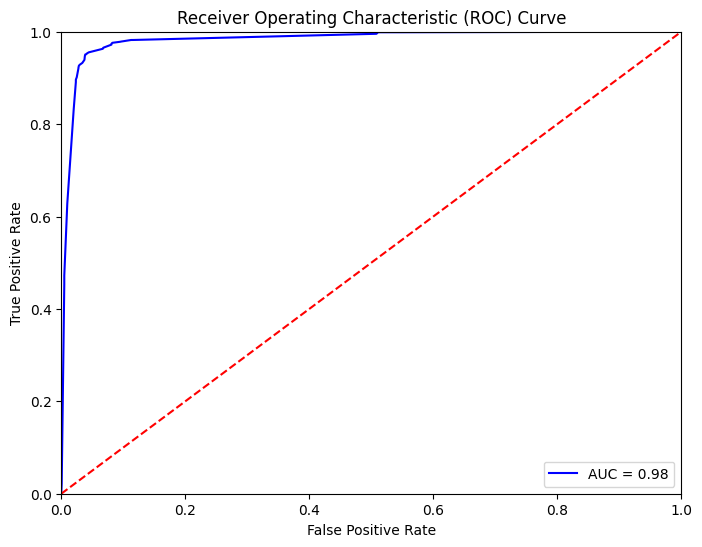

In [25]:
y_true = yr_test
y_scores = model_dt_smote.predict_proba(xr_test)[:, 1]
fpr, tpr, _ = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

### Random Forest

In [26]:
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [27]:
y_pred_rf=model_rf.predict(x_test)
y_pred_rf

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [28]:
conf_matrix = confusion_matrix(y_test, y_pred_rf)
print('Confusion Matrix:')
print(conf_matrix)
print('----------------------------------')

TN, FP, FN, TP = conf_matrix.ravel()

sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

print(f'Sensitivity: {sensitivity:.2f}')
print(f'Specificity: {specificity:.2f}')

print('----------------------------------')
print('Accuracy Score:')
print(accuracy_score(y_test,y_pred_rf))

print('----------------------------------')
print('Classification report:')
print(classification_report(y_pred_rf,y_test))

Confusion Matrix:
[[2019   62]
 [ 156  229]]
----------------------------------
Sensitivity: 0.59
Specificity: 0.97
----------------------------------
Accuracy Score:
0.9115977291159773
----------------------------------
Classification report:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95      2175
           1       0.59      0.79      0.68       291

    accuracy                           0.91      2466
   macro avg       0.78      0.86      0.81      2466
weighted avg       0.93      0.91      0.92      2466



#### Random Tree Classifier with SMOTE

In [29]:
model_rf_smote=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [30]:
model_rf_smote.fit(xr_train,yr_train)
yrf_pred = model_rf_smote.predict(xr_test)
yrf_pred

array([0, 1, 1, ..., 0, 1, 0], dtype=int64)

In [31]:
conf_matrix = confusion_matrix(yr_test, yrf_pred)
print('Confusion Matrix:')
print(conf_matrix)
print('----------------------------------')

TN, FP, FN, TP = conf_matrix.ravel()

sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

print(f'Sensitivity: {sensitivity:.2f}')
print(f'Specificity: {specificity:.2f}')

print('----------------------------------')
print('Accuracy Score:')
print(accuracy_score(yr_test,yrf_pred))

print('----------------------------------')
print('Classification report:')
print(classification_report(yrf_pred,yr_test))

Confusion Matrix:
[[1382   64]
 [  92 1698]]
----------------------------------
Sensitivity: 0.95
Specificity: 0.96
----------------------------------
Accuracy Score:
0.9517923362175525
----------------------------------
Classification report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1474
           1       0.95      0.96      0.96      1762

    accuracy                           0.95      3236
   macro avg       0.95      0.95      0.95      3236
weighted avg       0.95      0.95      0.95      3236



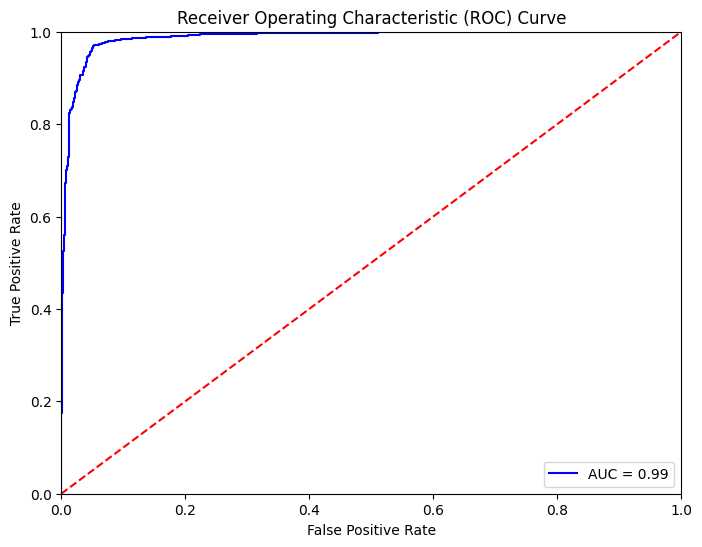

In [32]:
y_true = yr_test
y_scores = model_rf_smote.predict_proba(xr_test)[:, 1]
fpr, tpr, _ = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()